In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
#import cartopy
import numpy as np
#import cartopy.feature as cfeature
import datetime
import os
import statsmodels.api as sm
from pylab import rcParams
#from scipy.interpolate import Rbf
#from scipy.stats import kde
%matplotlib inline


In [68]:
concated=pd.read_csv('c:/concated.csv')
concated['Date']  = pd.to_datetime(concated.Date, errors='coerce', format='%Y-%m-%d')
concated.index = concated.Date
#concated.drop('Date', axis=1, inplace=True)

astrahan = concated.loc[concated['StName'] == 'Astrahan']
volgograd = concated.loc[concated['StName'] == 'Volgograd']
vologda = concated.loc[concated['StName'] == 'Vologda']
ryazan = concated.loc[concated['StName'] == 'Ryazan']
nizhnii = concated.loc[concated['StName'] == 'Nizhnii Novgorod']
rybinsk = concated.loc[concated['StName'] == 'Rybinsk']
moskva = concated.loc[concated['StName'] == 'Moskva']
izhevsk = concated.loc[concated['StName'] == 'Izhevsk']
ekaterinburg = concated.loc[concated['StName'] == 'Ekaterinburg']
perm = concated.loc[concated['StName'] == 'Perm']
kirov = concated.loc[concated['StName'] == 'Kirov']
kazan = concated.loc[concated['StName'] == 'Kazan']
ufa = concated.loc[concated['StName'] == 'Ufa']
penza = concated.loc[concated['StName'] == 'Penza']
samara = concated.loc[concated['StName'] == 'Samara']
saratov = concated.loc[concated['StName'] == 'Saratov']
krasnoufimsk = concated.loc[concated['StName'] == 'Krasnoufimsk']
kostroma = concated.loc[concated['StName'] == 'Kostroma']


In [3]:
names = {1: nizhnii, 2: ryazan, 3: kostroma, 4: rybinsk, 5: moskva,
           6: izhevsk, 7: ekaterinburg, 8: perm, 9: kirov, 10: kazan,
           11: ufa, 12: penza, 13: samara, 14: saratov, 15: volgograd,
           16: astrahan, 17: vologda, 18: krasnoufimsk}


In [4]:
start_date = '1938-01-01'   #y-m-d
end_date = '1978-07-01'

totuple = pd.DataFrame(columns=['r','lat','lon', 'temp'])

for key in names:
    totuple.at[key,'r'] = round(names[key].loc[start_date : end_date].Rainfall.sum())
    totuple.at[key,'lat'] = names[key].lat.iloc[1]
    totuple.at[key,'lon'] = names[key].lon.iloc[1]
    totuple.at[key,'temp'] = names[key].loc[start_date : end_date].Tmean.mean()


### Decompose

In [ ]:
city = kirov
city.Rainfall.interpolate(inplace=True)

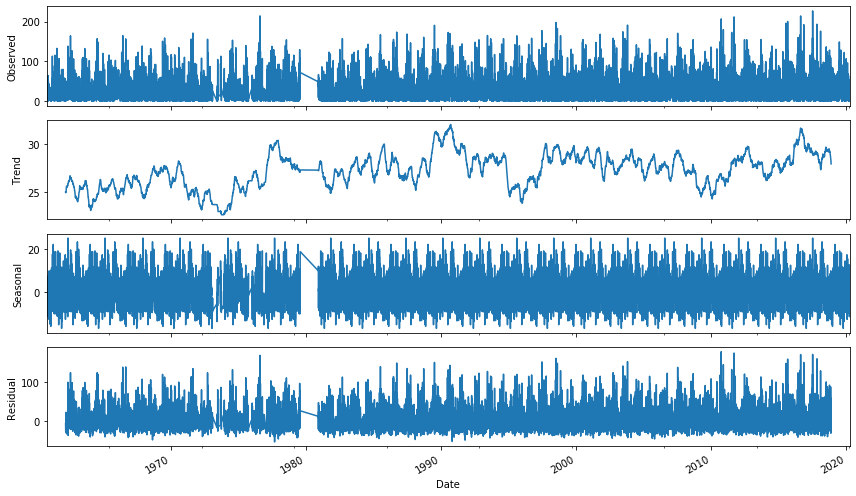

In [26]:
rcParams['figure.figsize']= 12,7
result = sm.tsa.seasonal_decompose(total.Rainfall, model='additive', freq=10*100)
result.plot()
plt.show()

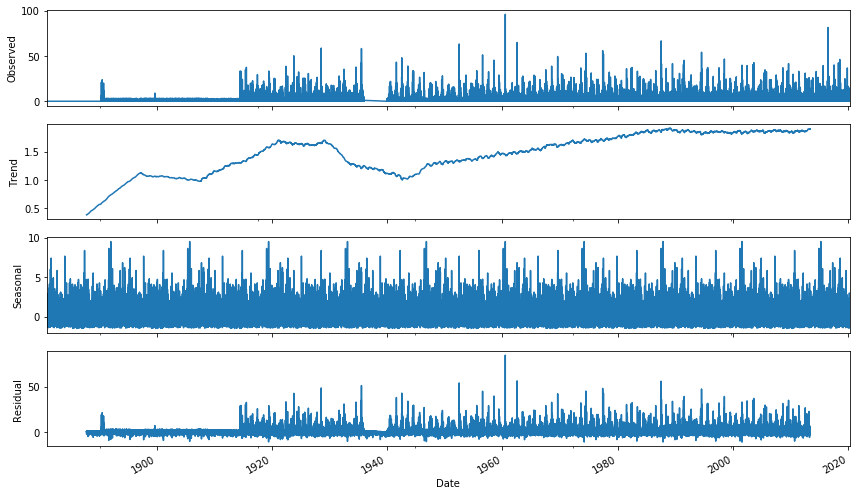

In [56]:
rcParams['figure.figsize']= 12,7
result = sm.tsa.seasonal_decompose(city.Rainfall, model='additive', freq=50*100)
result.plot()
plt.show()